
# Final Report
## Zillow Regression Project


## Goals
* Construct an ML Regression model that predicts propery tax assessed values ('taxvaluedollarcnt') of Single Family Properties using attributes of the properties.

* Find the key drivers of property value for single family properties.
* Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.
* Make recommendations on what works or doesn't work in predicting these homes' values.


## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import scipy.stats as stats
import seaborn as sns
import env
import os

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import acquire
import prepare
import explore

## Acquire

* Data acquired from the Codeup DB Server
* It contained 52442 rows and 6 columns
* The data was aquired on 15 MAY 2023
* Each row represents a unique Zillow property 
* Each column represents a feature of those properties


## Prepare
* This step involved to iterations
* Iniitial preperation
    * Removed columns were not from 2017
        * 1 row droped
    * Checked that column data types were appropriate
        * Changed float columns to int's
    * Checked for null values
        * All rows with Null values were dropped
    * Fips values were designated to appropriate county names
    * Outliers with a Z-score greater than 3 were removed
    * Dummy columns were created for modeling
    * Renamed columns to promote readability


### Data Dictionary

| Feature | Datatype | Key | Definition |
|---|---|---|---|
| county | object | Unique | labels each county from fips |
| taxvalue | int64 | in USD | tax assessed value of property |
| bedrooms | int64 | # rooms | number of bedrooms in property |
| bathrooms | int64 | # rooms | number of bathrooms |
| area | int64 | in Sqft | area of property structure |
| lot | int64 | in Sqft | area of property lot |
| county_LA | unit8 | 1 = Yes  <br>0 = No | is county LA |
| county_Orange | unit8 | 1 = Yes  <br>0 = No | is county Orange |
| county_Ventura | unit8 | 1 = Yes  <br>0 = No | is county Ventura |

### Bring in Data for Exploration

In [2]:
# Acquiring data
df = acquire.get_zillow_data()
# Running initial preperation for exploration
df = prepare.prep_zillow(df)
# Split
train, validate, test = prepare.split_data(df)

csv file found and loaded

train -> (30273, 9), 60.0%
validate -> (10091, 9),20.0%
test -> (10092, 9), 20.0%


### Sneak Peak at the Data


In [3]:
train.head(3)

,county,taxvalue,bedrooms,bathrooms,area,lot,county_LA,county_Orange,county_Ventura
26821,Ventura,403700,5,2,2510,8120,0,0,1
21357,Orange,862962,3,2,1353,5940,0,1,0
15544,LA,734067,3,2,1687,6002,1,0,0


### Summary of Data

In [4]:
train.describe()

,taxvalue,bedrooms,bathrooms,area,lot,county_LA,county_Orange,county_Ventura
count,3.027300e+04,30273.000000,30273.000000,30273.000000,30273.000000,30273.000000,30273.000000,30273.000000
mean,4.526862e+05,3.266673,2.155089,1825.360288,8972.546097,0.646319,0.268259,0.085423
std,3.838983e+05,0.880704,0.844490,774.922424,11908.879918,0.478120,0.443060,0.279514
min,1.000000e+03,1.000000,0.000000,360.000000,480.000000,0.000000,0.000000,0.000000
25%,1.888230e+05,3.000000,2.000000,1259.000000,5544.000000,0.000000,0.000000,0.000000
50%,3.633550e+05,3.000000,2.000000,1632.000000,6762.000000,1.000000,0.000000,0.000000
75%,5.893450e+05,4.000000,3.000000,2231.000000,8552.000000,1.000000,1.000000,0.000000
max,2.671888e+06,6.000000,5.000000,4902.000000,270702.000000,1.000000,1.000000,1.000000


## Exploration

* I divided all the features in related groups for charting and evaluations
* All features independently evaluated against taxvalue
* alpha =.05 for all satistics ran
* For catagorical features T-tests were used
* For numerical features pearsonsr was used

### 1. Dose the county and area of the poperty provide relevant predicting tax value?

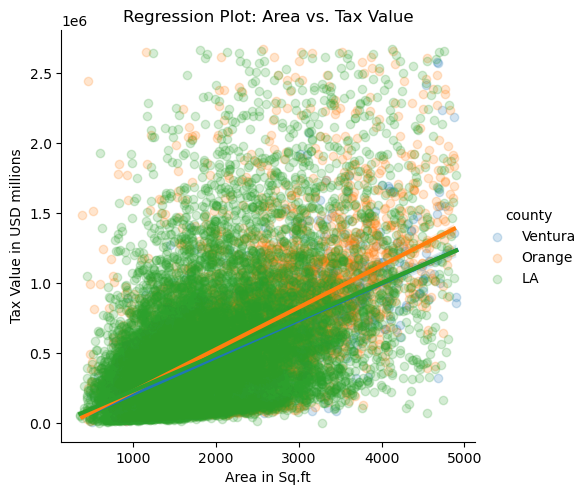

In [5]:
# Get visualizaions
explore.plot_regression(train)

#### Charting Observations: Counties
* The county the poperty does have a linear relationship with tax value

####  Statistics: Counties
* I will use a confidence interval of 95%
* The resulting alpha is .05

##### Hypothisis: County
$H_0$ : tax value is independent of property county<br>
$H_a$ : tax value is not independent of property county

In [6]:
# Running stat test
explore.run_all_ttests(train)

,T-Statistic,P-Value,Decision,County
0,-205.167310,0.0,Reject Null Hypothesis,LA County
1,-205.167482,0.0,Reject Null Hypothesis,Orange County
2,-205.167564,0.0,Reject Null Hypothesis,Ventura County


##### Hypothisis: area
$H_0$ : area and taxvalue are not linearly dependent<br>
$H_a$ : area and taxvalue are linearly dependent

In [7]:
explore.get_areastats(train)

,x_variable,r,p_value,evaluation
0,area,0.549888,0.0,Reject Null


#### Result
Based on the results of the statistics and the observation of the chart, the county the property lies in and he area of the home are statisically relevant and will have some positive impact on the model.

### 2. Does the number of bedrooms provide predictive value for churn?

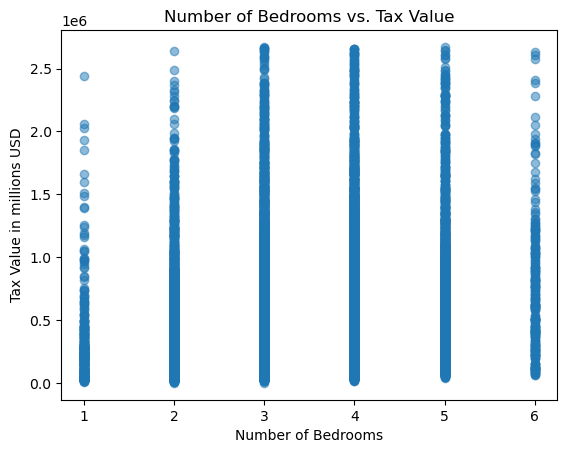

In [8]:
# Get visualizaions
explore.bed_chart(train)

#### Charting Observations: Bedrooms
* The number of bedrooms does have a relationship with tax value
* there is a nice normal distribution

####  Statistics: Bedrooms
* I will use a confidence interval of 95%
* The resulting alpha is .05

##### Hypothisis: Bedrooms
$H_0$ : tax value is independent of number of bedrooms<br>
$H_a$ : tax value is not independent of number of bedrooms

In [9]:
# Run stats
explore.get_bedstats(train) 

,x_variable,r,p_value,evaluation
0,bedrooms,0.245726,0.0,Reject Null


#### Result
Based on the results of the statistics and the observation of the chart, the number of bedrroms the home has is statisically relevant and will have some positive impact on the model.

### 3. Does the number of bathrooms provide relevant predictive value tax value?

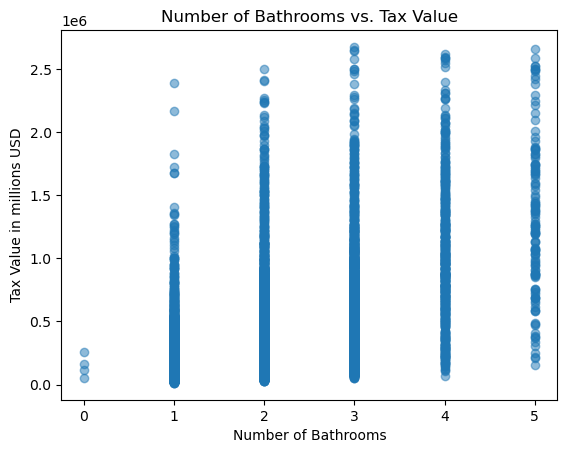

In [10]:
# Get visualizaions
explore.bath_chart(test)

#### Charting Observations: Bathrooms
* The number of bathrooms does have a relationship with tax value
* there is a normal distribution

####  Statistics: Bedrooms
* I will use a confidence interval of 95%
* The resulting alpha is .05

##### Hypothisis: Bathdrooms
$H_0$ : tax value is independent of number of bathrooms<br>
$H_a$ : tax value is not independent of number of bathrooms

In [11]:
# Running t-stat test
explore.get_bathstats(train)

,x_variable,r,p_value,evaluation
0,bathrooms,0.453631,0.0,Reject Null


#### Result
Based on the results of the statistics and the observation of the chart, the number of bedrroms the home has is statisically relevant and will have some positive impact on the model.

### 4. Does the size of the lot provide predictive value for tax value? 

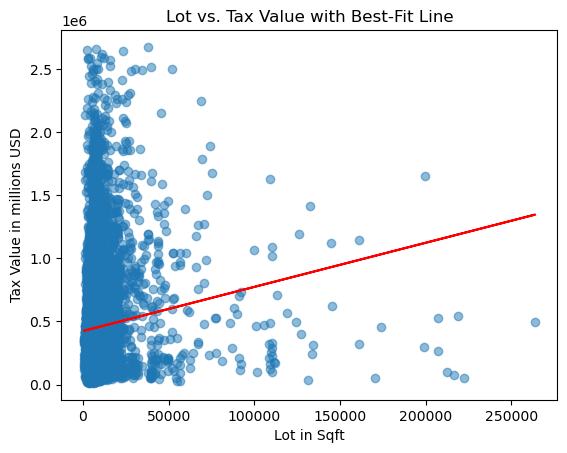

In [12]:
# Get visualizaions
explore.lot_chart(test)

#### Chart Observations: Lot
* lot does appear to have a linear relationship to tax value once the best fit line is added


####  Statistics: Bedrooms
* I will use a confidence interval of 95%
* The resulting alpha is .05

##### Hypothisis: Lot
$H_0$ : lot and taxvalue are not linearly dependent<br>
$H_a$ : lot and taxvalue are linearly dependent

In [13]:
# Running stat test
explore.get_lotstats(train)

,x_variable,r,p_value,evaluation
0,lot,0.107927,0.0,Reject Null


#### Result
* Based on the results of the statistics and the observation of the chart, the lot size is statisically relevant and will have some positive impact on the model.

## Exploration Summary
* All the selected featuresare related to taxvalue 
* A combination of these features should create a predictive model for tax value

### Features I am moving to modeling with
* 'bedrooms'
* 'bathrooms'
* 'area'
* 'lot'
* 'county_LA'
* 'county_Orange'
* 'county_Ventura'

### Features I'm not moving to modeling with
* 'county' -  repeated data but was needed for visualization

## Modeling

### Introduction
* Before modeling I will be scaling 'area' and 'lot'
* Recall will be the primary evaluation metric 
    * For Telco the cost of a false negative is greater than a false positives 
    * False negative being that did not spend the money on a customer that then churned.
    * False positives increase retention cost on customer that would not have churned, 
    * Cost of lost Future monthly revenue excedes retention cost

In [14]:
# Scaling area and lot
X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test = explore.scale_data(train, validate, test, ['area', 'lot'])

#### Baseline 

In [15]:
# get baseline 
explore.get_blinemetrics(y_train)

,model,rmse,r2
0,baseline,383891.952694,0.0


In [16]:
X_train_scaled.head()

,bedrooms,bathrooms,area,lot,county_LA,county_Orange,county_Ventura
26821,5,2,0.473360,0.028273,0,0,1
21357,3,2,0.218626,0.020206,0,1,0
15544,3,2,0.292162,0.020435,1,0,0
22074,4,2,0.241083,0.022648,0,1,0
23745,3,1,0.158961,0.017153,1,0,0


### Four Models

In [17]:
# running 4 models with preped data for modeling, retuning accuracy and recall 
explore.get_models()

AttributeError: module 'explore' has no attribute 'get_models'

### Model Selection
* All Models gave gave very similar results
    * All out performed the baseline
    * Logistic Regression gave the highest Recall on the validation set
* I will use the Logistic Regression model for the unseen Test data

### Test Model: Logistic Regression


In [ ]:
explore.get_test_model()

### Modeling Wrap 
* On the test set the model returned a Recall of 52.14% far exceeding the baseline
    * for Reference the Acurracy exceeded the baseline by 7.72%
* This model should be used in production

## Conclusion

### Summery
* After evaluating each group of features only a few proved useful for our model
* Recall proved the best metric for evaluating various models created 
* By combining the relevant features into a series of models I found a the linear regression model was best

### Recommendations
* Implement the model provided and
* Work with marketing to form campaigns to reduce the churn rate for the company
* These programs can be offered to seperate test markets and later be evaluated to determine which is best
* Investigate reason for fiber optic customers without tech support churning faster than others

### Next Steps
* If provided more time to work on the project I would want to explore which month costomers tend to churn after converting to a month-to-month contract. This could provide insight into when is the best time to start retintion campaigns. 